In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks

In [2]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
fmt_thous = mticks.FuncFormatter(thousands)

In [3]:
df = pd.read_csv("City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
display(df.head())
df.info()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


In [4]:
# 4 largest citites filter
large_4 = df["SizeRank"] <= 3
largestcities = df[large_4]
largestcities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
column_list = ["RegionID","SizeRank", "RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"]
largestcities_melted = pd.melt(largestcities, id_vars = column_list, value_name = "HomeValue", var_name = "Date")
largestcities_melted["datetime"] = pd.to_datetime(largestcities_melted["Date"])
largestcities_melted = largestcities_melted.drop(columns = "Date")
largestcities_melted = largestcities_melted.set_index("datetime")
display(largestcities_melted)
largestcities_melted.info()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
datetime,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   HomeValue   1087 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 85.3+ KB


In [6]:
# Inputting missing values
largestcities_melted["HomeValue"] = largestcities_melted["HomeValue"].interpolate()
display(largestcities_melted)
largestcities_melted.info()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
datetime,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   HomeValue   1092 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 85.3+ KB


In [7]:
largestcities_ts = largestcities_melted.groupby("Metro").resample("MS").sum()
largestcities_ts

C:\Users\spart\AppData\Local\Temp\ipykernel_18140\2207105838.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  largestcities_ts = largestcities_melted.groupby("Metro").resample("MS").sum()


RegionID  SizeRank  \
Metro                                 datetime                         
Chicago-Naperville-Elgin, IL-IN-WI    2000-01-01     17426         3   
                                      2000-02-01     17426         3   
                                      2000-03-01     17426         3   
                                      2000-04-01     17426         3   
                                      2000-05-01     17426         3   
...                                                    ...       ...   
New York-Newark-Jersey City, NY-NJ-PA 2022-05-01      6181         0   
                                      2022-06-01      6181         0   
                                      2022-07-01      6181         0   
                                      2022-08-01      6181         0   
                                      2022-09-01      6181         0   

                                                  HomeValue  
Metro                                 datetime               
Chicago-Naperville-Elgin, IL-IN-WI    2000-01-01   166139.0  
                                      2000-02-01   166536.0  
                                      2000-03-01   167368.0  
                                      2000-04-01   168826.0  
                                      2000-05-01   170499.0  
...                                                     ...  
New York-Newark-Jersey City, NY-NJ-PA 2022-05-01   768797.0  
                                      2022-06-01   773944.0  
                                      2022-07-01   777692.0  
                                      2022-08-01   779960.0  
                                      2022-09-01   781622.0  

[1092 rows x 3 columns]

In [8]:
largestcities_ts_unstacked = largestcities_ts.unstack(level = 0)

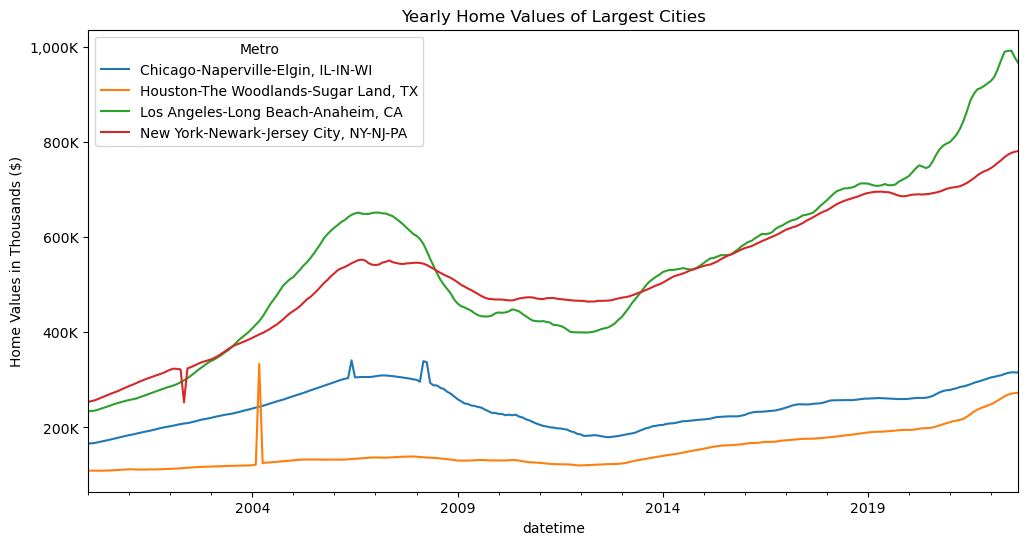

In [9]:
largestcities_ts_unstacked2 = largestcities_ts_unstacked["HomeValue"]

fig, ax = plt.subplots(figsize = (12, 6))
largestcities_ts_unstacked2.plot(ax = ax, title = "Yearly Home Values of Largest Cities");
ax.set_ylabel("Home Values in Thousands ($)")
ax.yaxis.set_major_formatter(fmt_thous)

Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [38]:
ts2 = largestcities_melted.loc["2008-12-31"]
high_value = ts2["HomeValue"].idxmax()
high_val_2008 = ts2.loc[high_value]
high_val_2008 = high_val_2008.reset_index()

highest = high_val_2008.loc[0, "HomeValue"]
highest_city = high_val_2008.loc[0, "Metro"]
lowest = high_val_2008.loc[3, "HomeValue"]
lowest_city = high_val_2008.loc[3, "Metro"]

print(f"{highest_city} had the HIGHEST Typical Home Value at {highest}. \n{lowest_city} had the LOWEST Typical Home Value at {lowest}.")

New York-Newark-Jersey City, NY-NJ-PA had the HIGHEST Typical Home Value at 510309.0. 
Chicago-Naperville-Elgin, IL-IN-WI had the LOWEST Typical Home Value at 265306.0.


In [29]:
high_val_2008

,datetime,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
0,2008-12-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,510309.0
1,2008-12-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,469294.0
2,2008-12-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,131283.0
3,2008-12-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,265306.0


How much did the home values change from November 2008 to December 2008 (in dollars)?

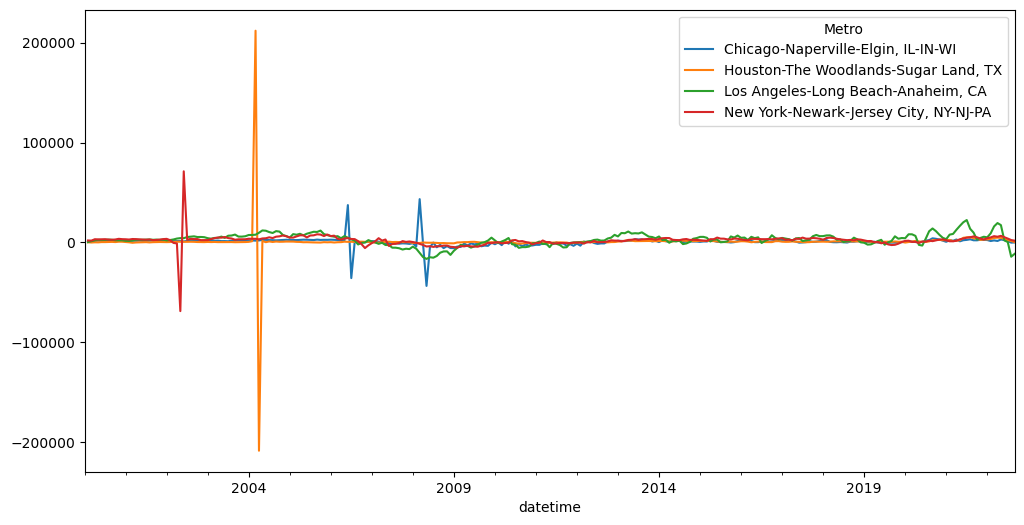

In [11]:
largestcities_ts_diff = largestcities_ts_unstacked.diff()
ax = largestcities_ts_diff["HomeValue"].plot(figsize = (12, 6))

In [41]:
largestcities_ts = largestcities_melted.loc['2008-11-01':'2009-01-01','HomeValue'].copy().dropna()
largestcities_ts.diff()

datetime
2008-11-30         NaN
2008-11-30    -32862.0
2008-11-30   -349658.0
2008-11-30    138812.0
2008-12-31    239250.0
2008-12-31    -41015.0
2008-12-31   -338011.0
2008-12-31    134023.0
Name: HomeValue, dtype: float64